## About Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attributes and 1 output attribute (class) The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv',header=0)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [58]:
df.isna().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [59]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [60]:
df.iloc[120:130, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


In [61]:
df = df.dropna().reset_index(drop=True)
df.iloc[120:130, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
124,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
125,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
126,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
127,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
128,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
129,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire


##### Add a new feature Region where 0 represents Bejaia Region and 1 Sidi-Bel Abbes Region

In [62]:
df.loc[:121,"Region"] = 0
df.loc[123:,"Region"] = 1
df = df.drop(index=122).reset_index(drop=True)

In [63]:
df.loc[120:130, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1.0
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1.0


In [64]:
df['Region'] = df['Region'].astype('int')

In [65]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [66]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [67]:
df.columns = df.columns.str.strip()


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


#### Converting all columns to their respective dtypes

In [69]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype('int')
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [70]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [71]:
df['Classes'] = np.where(df['Classes'] == 'fire', 1, 0)

In [72]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv', index=False)

# Exploratory Data Analysis

In [73]:
df_copy = df.drop(columns=['day', 'month', 'year'])
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [74]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [75]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

### Correlation:

<Figure size 1000x600 with 0 Axes>

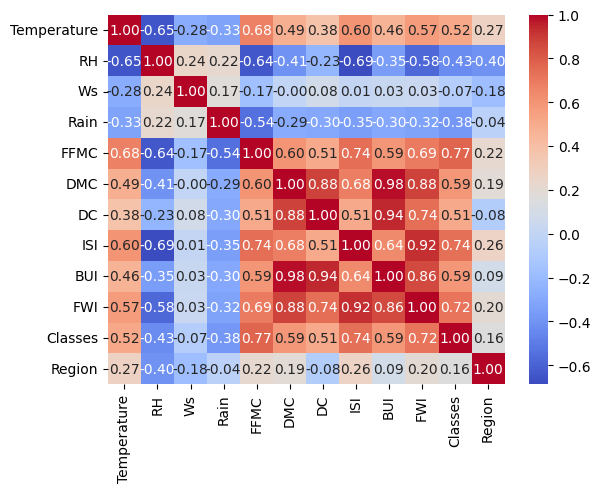

<Figure size 1000x600 with 0 Axes>

In [76]:
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.figure(figsize=(10, 6))

<Axes: xlabel='Classes', ylabel='Temperature'>

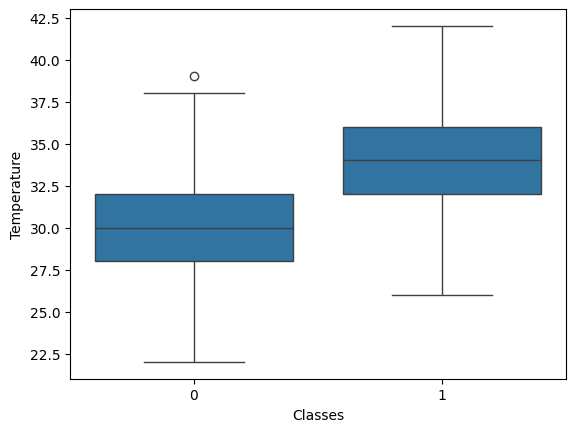

In [77]:
sns.boxplot(x='Classes', y='Temperature', data=df_copy)

<Figure size 1000x600 with 0 Axes>

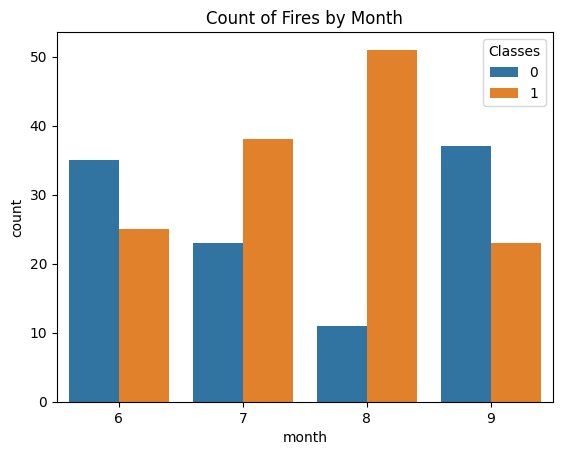

<Figure size 1000x600 with 0 Axes>

In [78]:
sns.countplot(x='month', hue='Classes', data=df)
plt.title('Count of Fires by Month')
plt.figure(figsize=(10, 6))

#### From above, we can observe that majority of the fires happened during the month of August, followed by those in July. So these are the 2 months where we should take greater precautions/measures to avoid these mishaps from happening